## Практическое задание

Используем набор примеров fashion-MNIST

In [82]:
# Импорт необходимых библиотек
###############################
import numpy as np
import pandas as pd
#import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
"""The classes are:

  | Label | Description |
  |:-----:|-------------|
  |   0   | T-shirt/top |
  |   1   | Trouser     |
  |   2   | Pullover    |
  |   3   | Dress       |
  |   4   | Coat        |
  |   5   | Sandal      |
  |   6   | Shirt       |
  |   7   | Sneaker     |
  |   8   | Bag         |
  |   9   | Ankle boot  |
  
                            """
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [83]:
# Загрузка Fashion_MNIST
(train_images_f,train_labels),(test_images_f,test_labels)=fashion_mnist.load_data()

In [84]:
# Классы датасета
classes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [85]:
# Normalize the images.
train_images_f = (train_images_f / 127) - 1
test_images_f = (test_images_f / 127) - 1

# Flatten the images.
train_images = train_images_f.reshape((-1, 784))
test_images = test_images_f.reshape((-1, 784))

In [86]:
n = 9
ind=np.where(train_labels==n)[0]
ind

array([    0,    11,    15, ..., 59932, 59970, 59978])

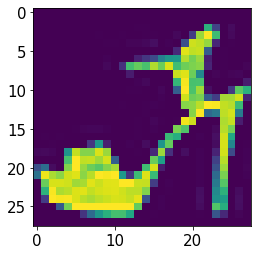

In [87]:
#plt.gray()
plt.imshow(train_images_f[n,:,:])
plt.show()

In [88]:
# Размер набора входных данных для обучения
train_images.shape,test_images.shape

((60000, 784), (10000, 784))

In [89]:
# Собираем сеть по слоям через .add()
#####################################################################################
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
model = Sequential(name='my_model')
model.add( Dense( 128, activation='relu', input_shape=(784,)))  
# Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
for k in range(2):
  model.add(Dense(  10+(10-k)*10, activation='tanh')) 
  
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
# число классов взято из исходного кода
model.add(Dense(10, activation='softmax')) 


In [90]:
# Компилируем сеть с оптимизатором , функцией потерь и метрикой
model.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 

In [91]:
model.summary( )

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 128)               100480    
                                                                 
 dense_161 (Dense)           (None, 110)               14190     
                                                                 
 dense_162 (Dense)           (None, 100)               11100     
                                                                 
 dense_163 (Dense)           (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)
y_train = to_categorical( train_labels)
y_test = to_categorical(test_labels)

In [93]:
y_train[:4,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [94]:
# Посмотрим на реакции модели до обучения
y_pred = model.predict(test_images[:,:])

In [95]:
y_pred[0,:]

array([0.15540074, 0.07465954, 0.03548342, 0.03527035, 0.03580892,
       0.26276278, 0.08601061, 0.06422258, 0.12848741, 0.12189373],
      dtype=float32)

In [96]:
y_class = np.argmax(y_pred, axis=1)
print(y_class) 

[5 9 0 ... 0 0 0]


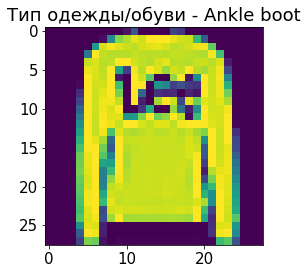

In [97]:
n = 1
plt.imshow(test_images_f[n,:,:])
plt.title('Тип одежды/обуви - ' + str(classes[y_class[n]]))
plt.show()

In [98]:
# Сделаем цикл тренировки модели
###################################
model.fit( 
  train_images,
  y_train,
  epochs=15,
  batch_size=1024, validation_split=0.2
)

# Evaluate the model.
model.evaluate(
  test_images,
  y_test
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/15
47/47 [==============================] - 2s 25ms/step - loss: 0.7833 - accuracy: 0.7334 - val_loss: 0.5008 - val_accuracy: 0.8198
Epoch 2/15
47/47 [==============================] - 1s 21ms/step - loss: 0.4479 - accuracy: 0.8413 - val_loss: 0.4245 - val_accuracy: 0.8454
Epoch 3/15
47/47 [==============================] - 1s 21ms/step - loss: 0.3932 - accuracy: 0.8601 - val_loss: 0.4128 - val_accuracy: 0.8503
Epoch 4/15
47/47 [==============================] - 1s 21ms/step - loss: 0.3631 - accuracy: 0.8700 - val_loss: 0.3729 - val_accuracy: 0.8663
Epoch 5/15
47/47 [==============================] - 1s 21ms/step - loss: 0.3411 - accuracy: 0.8771 - val_loss: 0.3636 - val_accuracy: 0.8663
Epoch 6/15
47/47 [==============================] - 1s 21ms/step - loss: 0.3191 - accuracy: 0.8834 - val_loss: 0.3465 - val_accuracy: 0.8734
Epoch 7/15
47/47 [==============================] - 1s 21ms/step - loss: 0.3032 - accuracy: 0.8904 - val_loss: 0.3346 - val_accuracy: 0.8800
Epoch 8/15
47

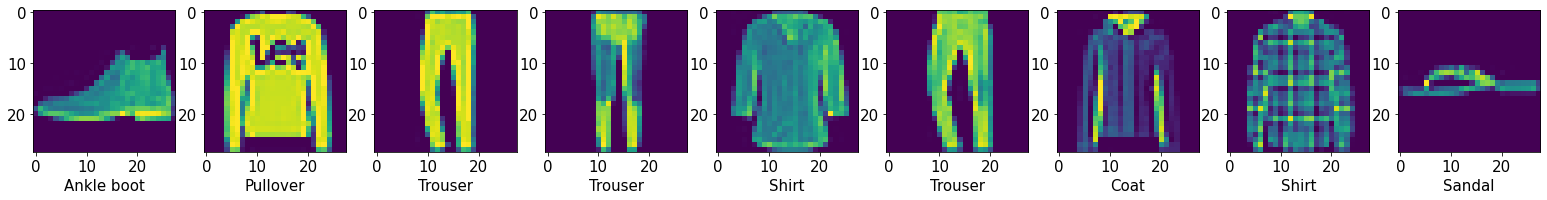

In [99]:
# Посмотрим на результат предсказаний (inference) для обученной модели (последняя в цикле)
N = 9
y_pred_2 = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred_2,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(classes[y_pred_class[i]])) 
plt.show()  

__1.  Опишите - какой результат получен в нейросети в зависимости от:__
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.



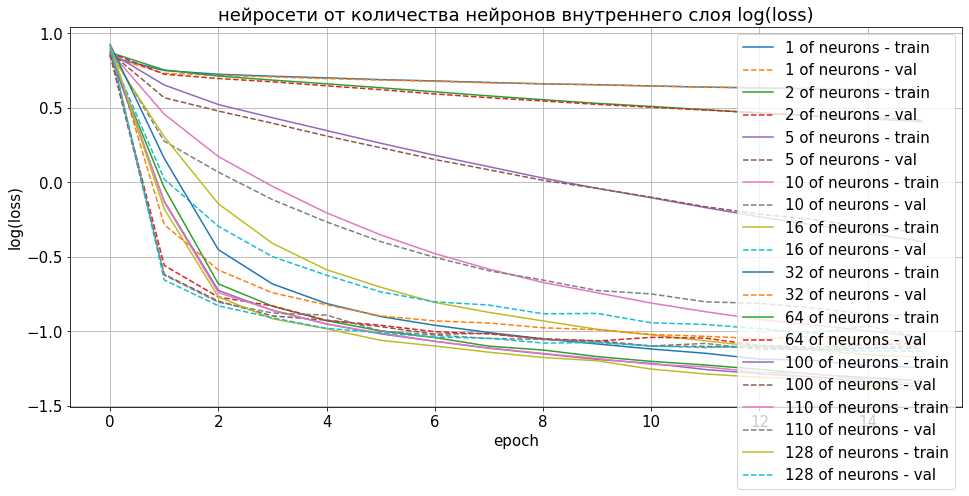

In [100]:
# Разное число нейронов в слое
###################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15

# вектор для выводoв результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
hh_list = []

# будем изменять количества нейронов внутреннего слоя
neur_list = [1, 2, 5, 10, 16, 32, 64, 100, 110, 128]
for i_neur in neur_list:
  # создаем модель model_1
  model_1 = Sequential([
                        Dense(64, activation='relu', input_shape=(784,)), # входной слой
                        Dense(i_neur, activation='tanh'), # скрытый слой
                        Dense(i_neur, activation='tanh'), # скрытый слой
                        Dense(10, activation='softmax') # выходной слой
                        ])
  # сохраняем ее веса (это начальная точка) model_1.save_weights('model_1.h5')
  model_1.save_weights('model_1.h5')
  # создаем рабочую модель model_i куда будем загружать эти весa (она должна быть идентичной структуры)
  model_i = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)), # входной слой
                      Dense(i_neur, activation='tanh'), # скрытый слой
                      Dense(i_neur, activation='tanh'), # скрытый слой
                      Dense(10, activation='softmax') # выходной слой
                      ])
  # загружаем веса model_i.load_weights('model_1.h5')
  model_i.load_weights('model_1.h5')
  # компилируем model_i с одним из оптимизаторов
  model_i.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для model_i без обучения
  hh0_tr = model_i.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = model_i.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = model_i.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики accuracy
  hh_list.append(hh.history)
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-', label = str(i_neur) + ' of neurons' +' - train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--', label = str(i_neur) + ' of neurons' + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества нейронов внутреннего слоя log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [101]:
model_i.summary() # последняя нейронная сеть цикла

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 64)                50240     
                                                                 
 dense_241 (Dense)           (None, 128)               8320      
                                                                 
 dense_242 (Dense)           (None, 128)               16512     
                                                                 
 dense_243 (Dense)           (None, 10)                1290      
                                                                 
Total params: 76,362
Trainable params: 76,362
Non-trainable params: 0
_________________________________________________________________


In [102]:
# сохраняем веса сети для эксперимента с разными оптимизаторами
model_i.save_weights('model_i.h5')

In [103]:
# метрики 'accuracy' и 'val_accuracy' для последней нейронной сети цикла
hh.history['accuracy'][-1],hh.history['val_accuracy'][-1]

(0.9098333120346069, 0.8818333148956299)

In [104]:
# проверка получившегося списка словарей с зафиксированной историей 
hh_list[9]['accuracy'][-1], hh_list[9]['val_accuracy'][-1]

(0.9098333120346069, 0.8818333148956299)

In [105]:
# создание двумерного массива из зафиксированных в истории данных по 'accuracy' и 'val_accuracy' по каждой сети
ac_list = []
for n in range(10):
  ac, v_ac = hh_list[n]['accuracy'][-1], hh_list[n]['val_accuracy'][-1]
  temp_list = [ac, v_ac]
  ac_list.append(temp_list)
ac_list

[[0.2005416601896286, 0.19833333790302277],
 [0.3747499883174896, 0.3580000102519989],
 [0.8785625100135803, 0.8527500033378601],
 [0.893708348274231, 0.8726666569709778],
 [0.8946666717529297, 0.8811666369438171],
 [0.8967291712760925, 0.8793333172798157],
 [0.9043124914169312, 0.8745833039283752],
 [0.9079791903495789, 0.8828333616256714],
 [0.9057916402816772, 0.875166654586792],
 [0.9098333120346069, 0.8818333148956299]]

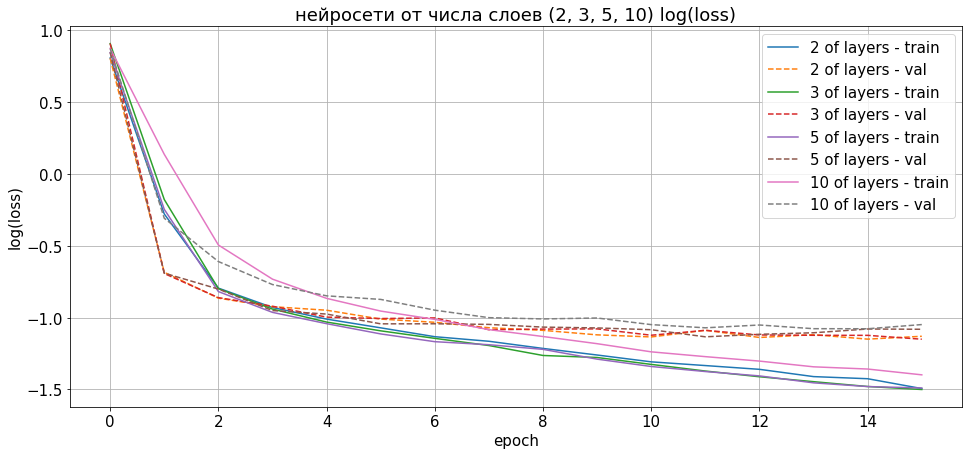

In [106]:
# Разное число слоев (2, 3, 5, 10)
###################################
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15

# вектор для выводoв результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
hh_2_list = []

# будем изменять число слоев (2, 3, 5, 10)
layer_list = [2, 3, 5, 10]
for i_layer in layer_list:
  # создаем модель model_2
  model_2 = Sequential(name='my_model_2')
  model_2.add( Dense( 128, activation='relu', input_shape=(784,))) # входной слой + поносвязный слой из 128 нейронов с активацией ReLU 
  for k in range(i_layer): # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    model_2.add(Dense(  10+(10-k)*10, activation='tanh')) 
  model_2.add(Dense(10, activation='softmax')) # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

  # сохраняем ее веса (это начальная точка) model_2.save_weights('model_2.h5')
  model_2.save_weights('model_2.h5')

  # создаем рабочую модель model_j куда будем загружать эти весa (она должна быть идентичной структуры)
  model_j = Sequential(name='my_model_j')
  model_j.add( Dense( 128, activation='relu', input_shape=(784,))) # входной слой + поносвязный слой из 128 нейронов с активацией ReLU 
  for k in range(i_layer): # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
    model_j.add(Dense(  10+(10-k)*10, activation='tanh')) 
  model_j.add(Dense(10, activation='softmax')) # выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax  
  # загружаем веса model_j.load_weights('model_2.h5')
  model_j.load_weights('model_2.h5')
  # компилируем model_j с одним из оптимизаторов
  model_j.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для model_j без обучения
  hh0_j_tr = model_j.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_j_val = model_j.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh_2 = model_j.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики accuracy
  hh_2_list.append(hh_2.history)
  # картинки
  plt.plot(epoch,np.log([hh0_j_tr[0]]+hh_2.history['loss']),'-', label = str(i_layer) + ' of layers' +' - train')
  plt.plot(epoch,np.log([hh0_j_val[0]]+hh_2.history['val_loss']),'--', label = str(i_layer) + ' of layers' + ' - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от числa слоев (2, 3, 5, 10) log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [107]:
# метрики 'accuracy' и 'val_accuracy' для последней нейронной сети цикла
hh_2.history['accuracy'][-1],hh_2.history['val_accuracy'][-1]

(0.9148541688919067, 0.8799166679382324)

In [108]:
# проверка получившегося списка словарей с зафиксированной историей
hh_2_list[3]['accuracy'][-1], hh_2_list[3]['val_accuracy'][-1]

(0.9148541688919067, 0.8799166679382324)

In [109]:
# создание двумерного массива из зафиксированных в истории данных по 'accuracy' и 'val_accuracy' по каждой сети
ac_list_2 = []
for n in range(4):
  ac, v_ac = hh_2_list[n]['accuracy'][-1], hh_2_list[n]['val_accuracy'][-1]
  temp_list = [ac, v_ac]
  ac_list_2.append(temp_list)
ac_list_2

[[0.9191458225250244, 0.8860833048820496],
 [0.9188958406448364, 0.8870833516120911],
 [0.9174166917800903, 0.8818333148956299],
 [0.9148541688919067, 0.8799166679382324]]

__Выводы:__

In [110]:
# создание итоговой сравнительной таблицы 'accuracy' и 'val_accuracy' в зависимости от числа нейронов сети
final_tab = pd.DataFrame(ac_list, index=['1 neuron', '2 neurons', '5 neurons', '10 neurons',
                                         '16 neurons', '32 neurons', '64neurons',
                                         '100 neurons', '110 neurons', '128 neurons'], 
                         columns=['accuracy', 'val_accuracy'])
final_tab

,accuracy,val_accuracy
1 neuron,0.200542,0.198333
2 neurons,0.374750,0.358000
5 neurons,0.878563,0.852750
10 neurons,0.893708,0.872667
16 neurons,0.894667,0.881167
32 neurons,0.896729,0.879333
64neurons,0.904312,0.874583
100 neurons,0.907979,0.882833
110 neurons,0.905792,0.875167
128 neurons,0.909833,0.881833


С увеличением числа нейронов внутреннего слоя растет и качество модели. Особенно резкий скачек метрик наблюдаем при увеличении чесла нейронов до 5-ти.

In [111]:
# создание итоговой сравнительной таблицы 'accuracy' и 'val_accuracy' в зависимости от числа слоев
final_tab_2 = pd.DataFrame(ac_list_2, index=['2 layers','3 layers', '5 layers', '10 layers'], 
                         columns=['accuracy', 'val_accuracy'])
final_tab_2

,accuracy,val_accuracy
2 layers,0.919146,0.886083
3 layers,0.918896,0.887083
5 layers,0.917417,0.881833
10 layers,0.914854,0.879917


При увеличении слоев нейронной сети рост метрик очень слабый, а при увеличении числа слоев до 10-ти даже наблюдается снижение метрик.

__2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.__

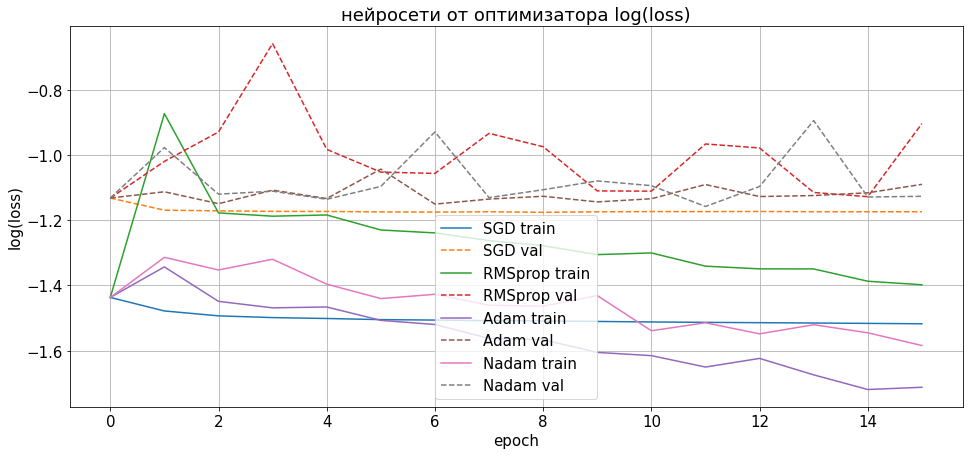

In [112]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводов результатов
epoch = np.arange(epochs+1)

# список словарей с историей по каждой нейронной сети в цикле
hh_3_list = []

# будем изменять оптимизаторы
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель model_k куда будем загружать веса модели из первого задания - model_i (она должна быть идентичной структуры)
  model_k = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)), # входной слой
                      Dense(128, activation='tanh'), # скрытый слой
                      Dense(128, activation='tanh'), # скрытый слой
                      Dense(10, activation='softmax') # выходной слой
                      ])
  # загружаем веса model_k.load_weights('model_i.h5')
  model_k.load_weights('model_i.h5')
  # компилируем model_k с одним из оптимизаторов
  model_k.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для model_k без обучения
  hh0_k_tr = model_k.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_k_val = model_k.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh_3 = model_k.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
  # фиксируем для тренировочного и тестового набора историю, в том числе и метрики accuracy
  hh_3_list.append(hh_3.history)
  # картинки
  plt.plot(epoch,np.log([hh0_k_tr[0]]+hh_3.history['loss']),'-',label = model_k.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_k_val[0]]+hh_3.history['val_loss']),'--',label = model_k.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [113]:
# метрики 'accuracy' и 'val_accuracy' для последней нейронной сети цикла
hh_3.history['accuracy'][-1],hh_3.history['val_accuracy'][-1]

(0.9245833158493042, 0.8896666765213013)

In [114]:
# проверка получившегося списка словарей с зафиксированной историей 
hh_3_list[3]['accuracy'][-1], hh_3_list[3]['val_accuracy'][-1]

(0.9245833158493042, 0.8896666765213013)

In [115]:
# создание двумерного массива из зафиксированных в истории данных по 'accuracy' и 'val_accuracy' по каждой сети
ac_list_3 = []
for n in range(4):
  ac, v_ac = hh_3_list[n]['accuracy'][-1], hh_3_list[n]['val_accuracy'][-1]
  temp_list = [ac, v_ac]
  ac_list_3.append(temp_list)
ac_list_3

[[0.9219375252723694, 0.8892499804496765],
 [0.9079375267028809, 0.8553333282470703],
 [0.9346666932106018, 0.8889999985694885],
 [0.9245833158493042, 0.8896666765213013]]

__Выводы:__

In [116]:
# создание итоговой сравнительной таблицы 'accuracy' и 'val_accuracy' в зависимости от оптимизатора
final_tab_3 = pd.DataFrame(ac_list_3, index=['SGD','RMSProp','adam','NAdam'], 
                         columns=['accuracy', 'val_accuracy'])
final_tab_3

,accuracy,val_accuracy
SGD,0.921938,0.889250
RMSProp,0.907938,0.855333
adam,0.934667,0.889000
NAdam,0.924583,0.889667


Наибольшие показатели 'accuracy' достигнуты при использовании оптимизатора 'adam', а 'val_accuracy' при использовании оптимизатора 'SGD'.


__3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?__ 

В тестовом наборе наилучшие показатели качества классификации нейросети были достигнуты при применении следующих гиперпараметров: 
- 110 нейронов внутреннего слоя
- 2 внутренних слоя
- оптимизатор 'SGD'.


__4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.__

In [123]:
y_pred_3 = model.predict(test_images[:,:])

yy = np.argmax(y_pred_3,axis=1)
matrix = np.where(test_labels != yy)


(array([  17,   23,   40, ..., 9972, 9977, 9979]),)

Так и не понял как выполнять задание №4.